In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

from scipy.stats import linregress

In [33]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [34]:
coordinates = list(lat_lngs)

In [35]:
cities = []

for i in coordinates:
    city = citipy.nearest_city(i[0], i[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

619

### Cities

In [36]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=600f325c215c12d724a14cc586d1562d


In [6]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the URL, record, and set numbers and the city
    print(f'Processing record {record_count} of set {set_count} | {city}')
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing record 1 of set 1 | gayny
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 2 of set 1 | avarua
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 3 of set 1 | louisbourg
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 4 of set 1 | nichinan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 5 of set 1 | vaini
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 6 of set 1 | codrington
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 7 of set 1 | moissala
-----------------------------
Data Retrieval Complete      
-----------------------------
Proces

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 14 of set 2 | luderitz
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 15 of set 2 | lakatoro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 16 of set 2 | lucatan
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 17 of set 2 | iqaluit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 18 of set 2 | guerrero negro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 19 of set 2 | saleaula
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 20 of set 2 | red bluff
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 26 of set 3 | lithakia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 27 of set 3 | tessalit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 28 of set 3 | dikson
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 29 of set 3 | weligama
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 30 of set 3 | amol
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 31 of set 3 | khrebtovaya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 32 of set 3 | saint-philippe
-----------------------------
Data Retrieval Complete      
--------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 38 of set 4 | agadez
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 39 of set 4 | ranong
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 40 of set 4 | nikolskoye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 41 of set 4 | new norfolk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 42 of set 4 | edremit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 43 of set 4 | lusambo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 44 of set 4 | quang ngai
-----------------------------
Data Retrieval Complete      
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 50 of set 5 | pirovskoye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 1 of set 6 | ixtapa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 2 of set 6 | tarauaca
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 3 of set 6 | chernyanka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 4 of set 6 | pevek
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 5 of set 6 | ancud
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 6 of set 6 | gopalpur
-----------------------------
Data Retrieval Complete      
-----------------------------
Pro

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 12 of set 7 | yuksekova
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 13 of set 7 | kahului
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 14 of set 7 | comodoro rivadavia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 15 of set 7 | juegang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 16 of set 7 | katsuura
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 17 of set 7 | bathsheba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 18 of set 7 | jieshi
-----------------------------
Data Retrieval Complete      
---------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 25 of set 8 | umm lajj
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 26 of set 8 | rawlins
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 27 of set 8 | patrasaer
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 28 of set 8 | touros
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 29 of set 8 | the valley
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 30 of set 8 | domanivka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 31 of set 8 | paamiut
-----------------------------
Data Retrieval Complete      
-----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 37 of set 9 | canutama
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 38 of set 9 | manzanillo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 39 of set 9 | mapiripan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 40 of set 9 | falealupo
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 41 of set 9 | bansi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 42 of set 9 | blagodatnoye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 43 of set 9 | katangli
-----------------------------
Data Retrieval Compl

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 50 of set 10 | beipiao
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 1 of set 11 | ponta delgada
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 2 of set 11 | santona
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 3 of set 11 | dubenskiy
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 4 of set 11 | sayyan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 5 of set 11 | staffanstorp
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 6 of set 11 | nago
-----------------------------
Data Retrieval Complet

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 11 of set 12 | kamenskoye
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 12 of set 12 | verkhnevilyuysk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 13 of set 12 | namtsy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 14 of set 12 | ilhabela
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 15 of set 12 | mount isa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 16 of set 12 | petropavlovsk-kamchatskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 17 of set 12 | richards bay
-------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 22 of set 13 | cookeville
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 23 of set 13 | jalu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 24 of set 13 | bonavista
-----------------------------
Data Retrieval Complete      
-----------------------------


In [38]:
len(city_data)

568

In [56]:
# Import from previous saved csv file
city_data_df = pd.read_csv('weather_data/cities.csv')
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Gayny,RU,2022-01-25 10:00:16,60.3071,54.3241,18.27,83,96,10.71
1,1,Avarua,CK,2022-01-25 09:58:18,-21.2078,-159.7750,75.25,100,20,1.14
2,2,Nichinan,JP,2022-01-25 10:00:18,31.6000,131.3667,46.76,83,96,7.36
3,3,Vaini,TO,2022-01-25 10:00:19,-21.2000,-175.2000,80.73,74,16,17.52
4,4,Codrington,AU,2022-01-25 10:00:20,-38.2667,141.9667,73.94,57,97,9.82


In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gayny,60.3071,54.3241,18.27,83,96,10.71,RU,2022-01-25 10:00:16
1,Avarua,-21.2078,-159.7750,75.25,100,20,1.14,CK,2022-01-25 09:58:18
2,Nichinan,31.6000,131.3667,46.76,83,96,7.36,JP,2022-01-25 10:00:18
3,Vaini,-21.2000,-175.2000,80.73,74,16,17.52,TO,2022-01-25 10:00:19
4,Codrington,-38.2667,141.9667,73.94,57,97,9.82,AU,2022-01-25 10:00:20
5,Moissala,8.3404,17.7663,92.26,10,34,7.36,TD,2022-01-25 10:00:21
6,Weihai,37.5017,122.1136,36.46,74,100,15.75,CN,2022-01-25 10:00:22
7,Airai,-8.9266,125.4092,65.21,86,90,3.31,TL,2022-01-25 10:00:23
8,Port Elizabeth,-33.9180,25.5701,74.10,78,75,13.80,ZA,2022-01-25 09:58:38
9,Georgetown,5.4112,100.3354,85.95,74,20,8.05,MY,2022-01-25 10:00:24


In [58]:
# Reorder columns
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp',
                              'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gayny,RU,2022-01-25 10:00:16,60.3071,54.3241,18.27,83,96,10.71
1,Avarua,CK,2022-01-25 09:58:18,-21.2078,-159.7750,75.25,100,20,1.14
2,Nichinan,JP,2022-01-25 10:00:18,31.6000,131.3667,46.76,83,96,7.36
3,Vaini,TO,2022-01-25 10:00:19,-21.2000,-175.2000,80.73,74,16,17.52
4,Codrington,AU,2022-01-25 10:00:20,-38.2667,141.9667,73.94,57,97,9.82


In [41]:
# Create an output file (csv)
output_data_file = 'weather_data/cities.csv'

# Export the City_Data DF into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

### Plotting

In [42]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

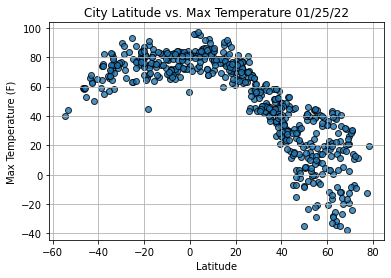

In [43]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps,
           edgecolor='black', linewidth=1,
           marker='o', label='Cities',
           alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

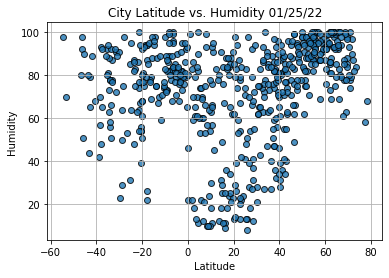

In [44]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, humidity,
           edgecolor='black', linewidth=1,
           marker='o', label='Cities',
           alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

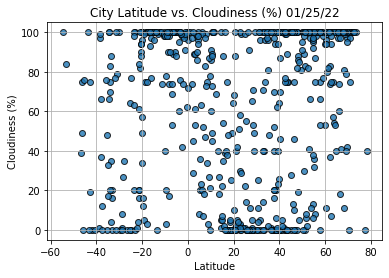

In [45]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, cloudiness,
           edgecolor='black', linewidth=1,
           marker='o', label='Cities',
           alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) {time.strftime('%x')}")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

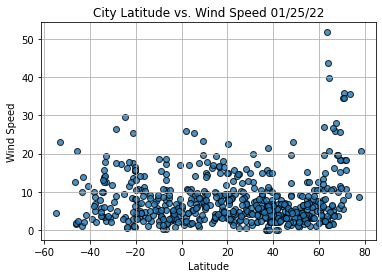

In [46]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, wind_speed,
           edgecolor='black', linewidth=1,
           marker='o', label='Cities',
           alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%x')}")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()

### Linear Regression Function

In [47]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate the regression line "y values"
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color='red')
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    
    
    plt.show()

In [67]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

In [68]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gayny,RU,2022-01-25 10:00:16,60.3071,54.3241,18.27,83,96,10.71
2,Nichinan,JP,2022-01-25 10:00:18,31.6000,131.3667,46.76,83,96,7.36
5,Moissala,TD,2022-01-25 10:00:21,8.3404,17.7663,92.26,10,34,7.36
6,Weihai,CN,2022-01-25 10:00:22,37.5017,122.1136,36.46,74,100,15.75
9,Georgetown,MY,2022-01-25 10:00:24,5.4112,100.3354,85.95,74,20,8.05


### Correlation Between Latitude and Maximum Temperature

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

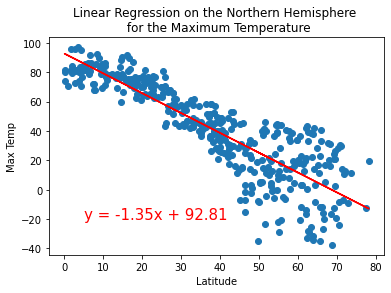

In [97]:
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for the Maximum Temperature',
                       'Max Temp', (5, -20))

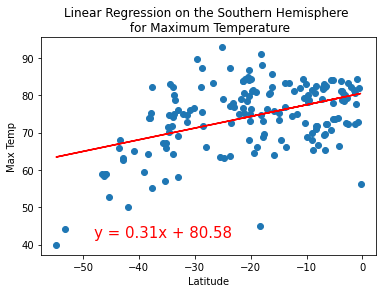

In [82]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp', (-48,42))

### Correlation Between Latitude and Percent Humidity

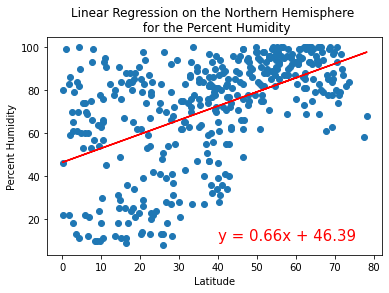

In [90]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                       'Linear Regression on the Northern Hemisphere \n for the Percent Humidity',
                       'Percent Humidity', (40, 10))

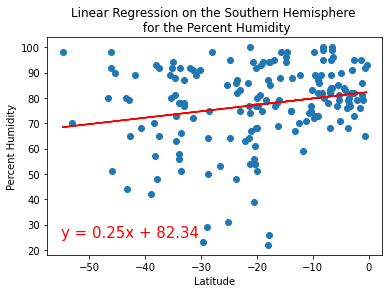

In [91]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                       'Linear Regression on the Southern Hemisphere \n for the Percent Humidity',
                       'Percent Humidity', (-55, 25))

### Correlation Between Latitude and Percent Cloudiness

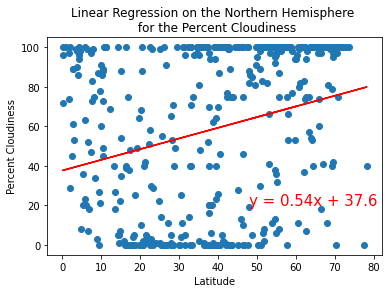

In [95]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                       'Linear Regression on the Northern Hemisphere \n for the Percent Cloudiness',
                       'Percent Cloudiness', (48, 20))

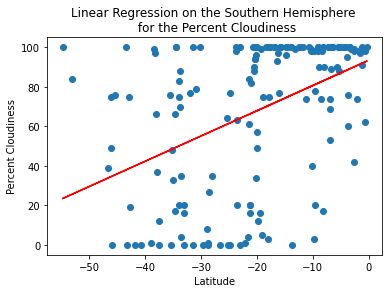

In [96]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                       'Linear Regression on the Southern Hemisphere \n for the Percent Cloudiness',
                       'Percent Cloudiness', (48, 20))

### Correlation Between Latitude and Wind Speed

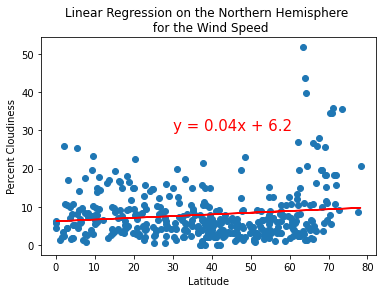

In [99]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                       'Linear Regression on the Northern Hemisphere \n for the Wind Speed',
                       'Percent Cloudiness', (30, 30))

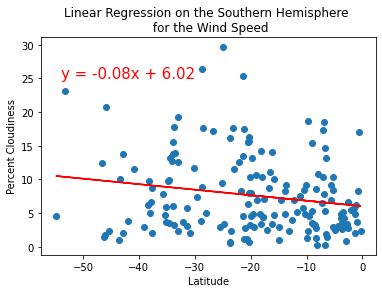

In [104]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                       'Linear Regression on the Southern Hemisphere \n for the Wind Speed',
                       'Percent Cloudiness', (-54, 25))